In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Apple Clean Data.csv to Apple Clean Data.csv


In [ ]:
df = pd.read_csv('Apple Clean Data.csv')
df.head(6)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,44561,178.09,179.23,177.26,177.57,177.57,"64,025,500"
1,44560,179.47,180.57,178.09,178.20,178.20,"59,773,000"
2,44559,179.33,180.63,178.14,179.38,179.38,"62,348,900"
3,44558,180.16,181.33,178.53,179.29,179.29,"79,144,300"
4,44557,177.09,180.42,177.07,180.33,180.33,"74,919,600"
5,44553,175.85,176.85,175.27,176.28,176.28,"68,356,600"


In [ ]:
df.shape

(99, 7)

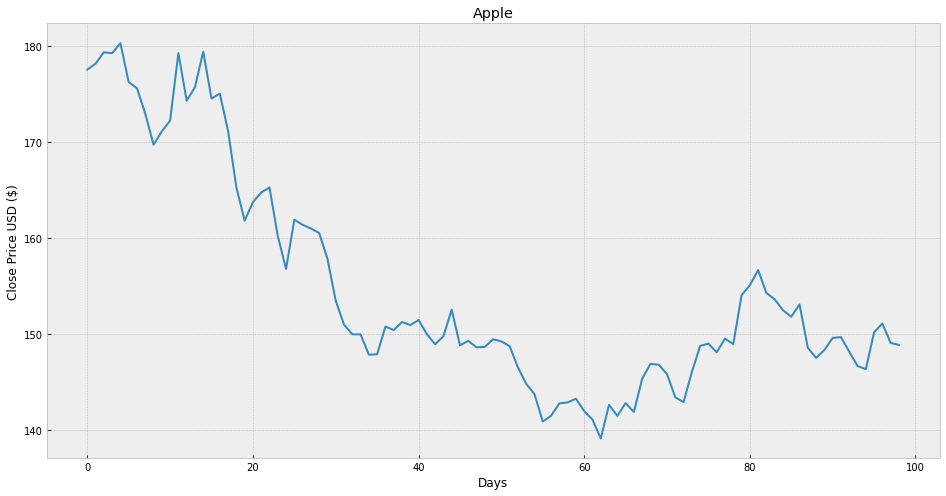

In [ ]:
plt.figure(figsize = (16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close*'])
plt.show()


In [ ]:
df = df[['Close*']]
df.head(4)

,Close*
0,177.57
1,178.20
2,179.38
3,179.29


In [ ]:
future_days = 30
df['Prediction'] = df[['Close*']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close*,Prediction
95,150.19,NaN
96,151.12,NaN
97,149.10,NaN
98,148.89,NaN


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
print(X)

[[177.57]
 [178.2 ]
 [179.38]
 [179.29]
 [180.33]
 [176.28]
 [175.64]
 [172.99]
 [169.75]
 [171.14]
 [172.26]
 [179.3 ]
 [174.33]
 [175.74]
 [179.45]
 [174.56]
 [175.08]
 [171.18]
 [165.32]
 [161.84]
 [163.76]
 [164.77]
 [165.3 ]
 [160.24]
 [156.81]
 [161.94]
 [161.41]
 [161.02]
 [160.55]
 [157.87]
 [153.49]
 [151.  ]
 [150.  ]
 [149.99]
 [147.87]
 [147.92]
 [150.81]
 [150.44]
 [151.28]
 [150.96]
 [151.49]
 [150.02]
 [148.96]
 [149.8 ]
 [152.57]
 [148.85]
 [149.32]
 [148.64]
 [148.69]
 [149.48]
 [149.26]
 [148.76]
 [146.55]
 [144.84]
 [143.76]
 [140.91]
 [141.51]
 [142.81]
 [142.9 ]
 [143.29]
 [142.  ]
 [141.11]
 [139.14]
 [142.65]
 [141.5 ]
 [142.83]
 [141.91]
 [145.37]
 [146.92]]


In [ ]:
X.shape

(69, 1)

In [ ]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[153.49 151.   150.   149.99 147.87 147.92 150.81 150.44 151.28 150.96
 151.49 150.02 148.96 149.8  152.57 148.85 149.32 148.64 148.69 149.48
 149.26 148.76 146.55 144.84 143.76 140.91 141.51 142.81 142.9  143.29
 142.   141.11 139.14 142.65 141.5  142.83 141.91 145.37 146.92 146.83
 145.85 143.43 142.94 146.06 148.79 149.03 148.12 149.55 148.97 154.07
 155.11 156.69 154.3  153.65 152.51 151.83 153.12 148.6  147.54 148.36
 149.62 149.71 148.19 146.7  146.36 150.19 151.12 149.1  148.89]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
x_train.shape

(51, 1)

In [ ]:
x_test.shape

(18, 1)

In [ ]:
y_train.shape

(51,)

In [ ]:
y_test.shape

(18,)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [ ]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[150.96],
       [151.49],
       [150.02],
       [148.96],
       [149.8 ],
       [152.57],
       [148.85],
       [149.32],
       [148.64],
       [148.69],
       [149.48],
       [149.26],
       [148.76],
       [146.55],
       [144.84],
       [143.76],
       [140.91],
       [141.51],
       [142.81],
       [142.9 ],
       [143.29],
       [142.  ],
       [141.11],
       [139.14],
       [142.65],
       [141.5 ],
       [142.83],
       [141.91],
       [145.37],
       [146.92]])

In [ ]:
x_future.shape

(30, 1)

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[141.11 145.85 143.43 142.94 146.06 148.79 149.03 148.12 148.97 148.97
 154.07 148.12 156.69 154.3  149.1  152.51 149.71 146.36 148.6  147.54
 148.36 149.62 149.71 149.71 146.7  146.36 150.19 151.12 149.1  148.89]

[147.71715431 147.74372368 147.67003128 147.61689254 147.65900248
 147.79786503 147.61137814 147.63493966 147.60085066 147.6033572
 147.6429606  147.6319318  147.60686636 147.49607711 147.4103533
 147.35621194 147.21333892 147.24341745 147.3085876  147.31309938
 147.33265043 147.26798159 147.2233651  147.12460726 147.30056666
 147.24291614 147.30959022 147.26346981 147.43692267 147.51462554]


In [ ]:
x_future.shape

(30, 1)

In [ ]:
tree_prediction.shape

(30,)

In [ ]:
lr_prediction.shape

(30,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


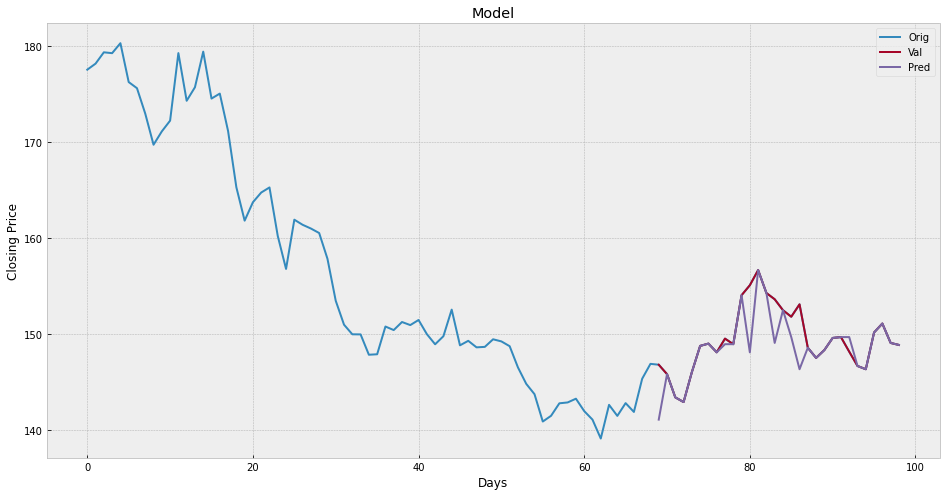

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df['Close*'])
plt.plot(valid[['Close*' , 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


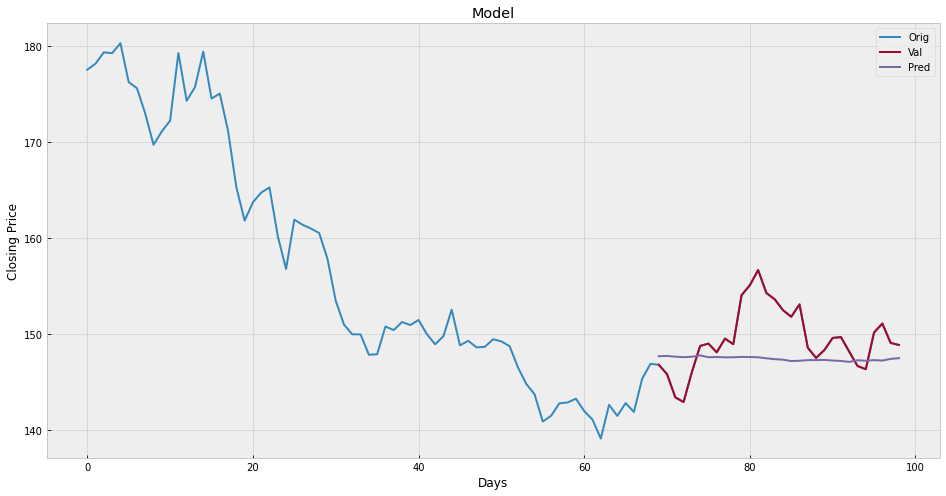

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df['Close*'])
plt.plot(valid[['Close*' , 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
print(X)

[[177.57]
 [178.2 ]
 [179.38]
 [179.29]
 [180.33]
 [176.28]
 [175.64]
 [172.99]
 [169.75]
 [171.14]
 [172.26]
 [179.3 ]
 [174.33]
 [175.74]
 [179.45]
 [174.56]
 [175.08]
 [171.18]
 [165.32]
 [161.84]
 [163.76]
 [164.77]
 [165.3 ]
 [160.24]
 [156.81]
 [161.94]
 [161.41]
 [161.02]
 [160.55]
 [157.87]
 [153.49]
 [151.  ]
 [150.  ]
 [149.99]
 [147.87]
 [147.92]
 [150.81]
 [150.44]
 [151.28]
 [150.96]
 [151.49]
 [150.02]
 [148.96]
 [149.8 ]
 [152.57]
 [148.85]
 [149.32]
 [148.64]
 [148.69]
 [149.48]
 [149.26]
 [148.76]
 [146.55]
 [144.84]
 [143.76]
 [140.91]
 [141.51]
 [142.81]
 [142.9 ]
 [143.29]
 [142.  ]
 [141.11]
 [139.14]
 [142.65]
 [141.5 ]
 [142.83]
 [141.91]
 [145.37]
 [146.92]]


In [ ]:
X.shape

(69, 1)

In [ ]:
y.shape

(69,)

In [ ]:
np.delete(X, 0, axis=1)

array([], shape=(69, 0), dtype=float64)

In [ ]:
X.shape

(69, 1)

In [ ]:
print(X)

[[177.57]
 [178.2 ]
 [179.38]
 [179.29]
 [180.33]
 [176.28]
 [175.64]
 [172.99]
 [169.75]
 [171.14]
 [172.26]
 [179.3 ]
 [174.33]
 [175.74]
 [179.45]
 [174.56]
 [175.08]
 [171.18]
 [165.32]
 [161.84]
 [163.76]
 [164.77]
 [165.3 ]
 [160.24]
 [156.81]
 [161.94]
 [161.41]
 [161.02]
 [160.55]
 [157.87]
 [153.49]
 [151.  ]
 [150.  ]
 [149.99]
 [147.87]
 [147.92]
 [150.81]
 [150.44]
 [151.28]
 [150.96]
 [151.49]
 [150.02]
 [148.96]
 [149.8 ]
 [152.57]
 [148.85]
 [149.32]
 [148.64]
 [148.69]
 [149.48]
 [149.26]
 [148.76]
 [146.55]
 [144.84]
 [143.76]
 [140.91]
 [141.51]
 [142.81]
 [142.9 ]
 [143.29]
 [142.  ]
 [141.11]
 [139.14]
 [142.65]
 [141.5 ]
 [142.83]
 [141.91]
 [145.37]
 [146.92]]
